In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

In [2]:
df=pd.read_csv('kidney.csv')
df.drop('id',axis=1,inplace=True)

In [3]:
#convert to numeric data type from object
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')

In [4]:
df.classification=df.classification.replace('ckd\t','ckd')
df.dm=df.dm.replace([' yes','\tno','\tyes'],['yes','no','yes'])
df.cad=df.cad.replace('\tno','no')

In [5]:
df["sg"]= df["sg"].fillna(df["sg"].value_counts().idxmax())
df["al"]= df["al"].fillna(df["al"].value_counts().idxmax())
df["su"]= df["su"].fillna(df["su"].value_counts().idxmax())
df["rbc"]= df["rbc"].fillna(df["rbc"].value_counts().idxmax())
df["pc"]= df["pc"].fillna(df["pc"].value_counts().idxmax())
df["pcc"]= df["pcc"].fillna(df["pcc"].value_counts().idxmax())
df["ba"]= df["ba"].fillna(df["ba"].value_counts().idxmax())
df["htn"]= df["htn"].fillna(df["htn"].value_counts().idxmax())
df["dm"]= df["dm"].fillna(df["dm"].value_counts().idxmax())
df["cad"]= df["cad"].fillna(df["cad"].value_counts().idxmax())
df["appet"]= df["appet"].fillna(df["appet"].value_counts().idxmax())
df["pe"]= df["pe"].fillna(df["pe"].value_counts().idxmax())
df["ane"]= df["ane"].fillna(df["ane"].value_counts().idxmax())

In [6]:
dictionary = {
    'rbc' :{
    'abnormal':1,
    'normal':0,
    },
    'pc' :{
    'abnormal':1,
    'normal':0,
    },
    'pcc' :{
    'notpresent':0,
    'present':1,
    },
    'ba' :{
    'notpresent':0,
    'present':1,
    },
    'htn' :{
    'yes':1,
    'no':0,
    },
    'dm' :{
    'yes':1,
    'no':0,
    },
    'cad' :{
    'yes':1,
    'no':0,
    },
    'appet' :{
    'good':1,
    'poor':0,
    },
    'pe' :{
    'yes':1,
    'no':0,
    },
    'ane' :{
    'yes':1,
    'no':0,
    },
    'classification':{
        'ckd':1,
        'notckd':0,
    }
}
df=df.replace(dictionary)

In [7]:
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)

In [8]:
df2 = pd.DataFrame(data = df_filled)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
 3   3       400 non-null    float64
 4   4       400 non-null    float64
 5   5       400 non-null    float64
 6   6       400 non-null    float64
 7   7       400 non-null    float64
 8   8       400 non-null    float64
 9   9       400 non-null    float64
 10  10      400 non-null    float64
 11  11      400 non-null    float64
 12  12      400 non-null    float64
 13  13      400 non-null    float64
 14  14      400 non-null    float64
 15  15      400 non-null    float64
 16  16      400 non-null    float64
 17  17      400 non-null    float64
 18  18      400 non-null    float64
 19  19      400 non-null    float64
 20  20      400 non-null    float64
 21  21      400 non-null    float64
 22  22

In [9]:
kolom = ['age','bp','sg','al','su','rbc','pc','pcc','ba',
          'bgr','bu','sc','sod','pot','hemo','pcv','wc','rc',
          'htn','dm','cad','appet','pe','ane','class']
df2.columns=kolom
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [10]:
#mulai perhitungan
score=[] 
algorithms=[] 

In [11]:
y=df2['class']
x=df2.drop(['class'],axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [13]:
#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

KNN accuracy = 64.16666666666667


In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_test,y_pred)
cm

array([[31, 13],
       [30, 46]], dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN score diferent valus')

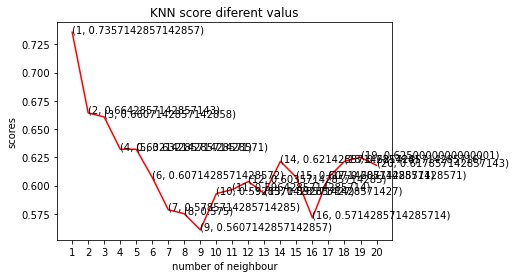

In [16]:
plt.plot([k for k in range(1,21)], knn_scores,color='red')
for i in range (1,21):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbour')
plt.ylabel('scores')
plt.title('KNN score diferent valus')

In [17]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',n_jobs=-1,
                                      weights='distance')

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [19]:
ypred=knn.predict(x_test)
print('acc : ',accuracy_score(y_test,ypred))

acc :  0.6666666666666666


In [20]:
sfs = SFS(knn,
        k_features=24,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=5,
        n_jobs=-1)

In [21]:
sfs=sfs.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    3.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.1s finished

[2021-01-25 15:08:14] Features: 1/24 -- score: 0.8428571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2021-01-25 15:08:14] Features: 2/24 -- score: 0.9142857142857143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2021-01-25 15:08:14] Features: 3/24 -- score: 0.9321428571428572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of

In [22]:
sfs = SFS(knn,
        k_features=9,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=5,
        n_jobs=-1)

In [23]:
sfs=sfs.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2021-01-25 15:08:16] Features: 1/9 -- score: 0.8428571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2021-01-25 15:08:17] Features: 2/9 -- score: 0.9142857142857143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2021-01-25 15:08:17] Features: 3/9 -- score: 0.9321428571428572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  2

In [24]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.8035714285714286, 0.9107142857142857, 0.857...",0.842857,"(hemo,)",0.065563,0.0510102,0.0255051
2,"(3, 14)","[0.875, 0.9464285714285714, 0.8928571428571429...",0.914286,"(al, hemo)",0.0367226,0.0285714,0.0142857
3,"(3, 14, 19)","[0.8928571428571429, 0.9642857142857143, 0.928...",0.932143,"(al, hemo, dm)",0.0304488,0.0236902,0.0118451
4,"(3, 14, 18, 19)","[0.9107142857142857, 0.9642857142857143, 0.964...",0.939286,"(al, hemo, htn, dm)",0.0275419,0.0214286,0.0107143
5,"(3, 14, 18, 19, 21)","[0.9107142857142857, 0.9821428571428571, 0.964...",0.946429,"(al, hemo, htn, dm, appet)",0.0324585,0.0252538,0.0126269
6,"(3, 14, 18, 19, 21, 23)","[0.9107142857142857, 1.0, 0.9642857142857143, ...",0.95,"(al, hemo, htn, dm, appet, ane)",0.0394875,0.0307226,0.0153613
7,"(2, 3, 14, 18, 19, 21, 23)","[0.9107142857142857, 1.0, 0.9642857142857143, ...",0.95,"(sg, al, hemo, htn, dm, appet, ane)",0.0394875,0.0307226,0.0153613
8,"(2, 3, 7, 14, 18, 19, 21, 23)","[0.9107142857142857, 1.0, 0.9642857142857143, ...",0.95,"(sg, al, pcc, hemo, htn, dm, appet, ane)",0.0394875,0.0307226,0.0153613
9,"(2, 3, 7, 8, 14, 18, 19, 21, 23)","[0.9107142857142857, 1.0, 0.9642857142857143, ...",0.95,"(sg, al, pcc, ba, hemo, htn, dm, appet, ane)",0.0394875,0.0307226,0.0153613


In [25]:
sfs.k_feature_idx_

(2, 3, 7, 8, 14, 18, 19, 21, 23)

In [26]:
xtrain_fs=sfs.transform(x_train)
xtest_fs=sfs.transform(x_test)

In [27]:
knn.fit(xtrain_fs,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [28]:
ypred=knn.predict(xtest_fs)

In [29]:
print('acc : ',accuracy_score(y_test,ypred)*100)

acc :  99.16666666666667
